# Clustering and Manifold Learning

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.preprocessing import RobustScaler #need for scaling attributes with outliers
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

### C. Scatterplot Function (to be used below for visualising a clustering)

In [10]:
colors = np.array(['orange', 'blue', 'lime', 'pink', 'green', 'purple','yellow', 'purple','brown', 'khaki'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):  
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### B. Load the Data, drop nans, rescale and select k values

In [2]:
# Load the dataset
df= pd.read_csv('CharlestownTotals.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)


In [3]:
# Find the number of nulls/NaNs in the dataset
df.isna().sum()


Area_m2              0
Average_Daily_kWh    0
Peak_Daily_kWh       0
dtype: int64

In [4]:
# drop any nans
df['Area_m2'].replace('', np.nan, inplace=True)
df.dropna(subset=['Area_m2'], inplace=True)
df.isna().sum()


Area_m2              0
Average_Daily_kWh    0
Peak_Daily_kWh       0
dtype: int64

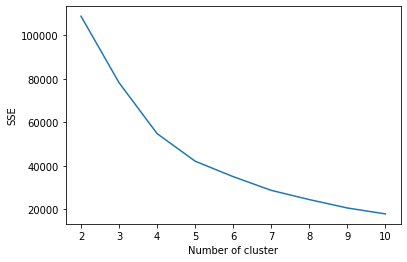

In [20]:
# Use Elbow methods to determine value of k, adapted from Prakash (2018)
# In general we are looking for the n_cluster (k) at the elbow of the arm in the Elbow method

sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df.values)
    df1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [22]:
# Use Silhouette Coefficient methods to determine value of k, adapted from Prakash (2018)
# In general we are looking for the n_cluster (k) with the largest Silhouette Coefficient 
# subject to the amount of known clusters (unknown in this case)

from sklearn.metrics import silhouette_score
for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(df.values)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df2.values, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.39735619833687386
For n_clusters=3, The Silhouette Coefficient is 0.3766249881448974
For n_clusters=4, The Silhouette Coefficient is 0.45273902834903135
For n_clusters=5, The Silhouette Coefficient is 0.4368336514869239
For n_clusters=6, The Silhouette Coefficient is 0.4524420117914959
For n_clusters=7, The Silhouette Coefficient is 0.45378065611366486
For n_clusters=8, The Silhouette Coefficient is 0.43966173110889917
For n_clusters=9, The Silhouette Coefficient is 0.4580826699902734
For n_clusters=10, The Silhouette Coefficient is 0.4632813103443011
For n_clusters=11, The Silhouette Coefficient is 0.4712376049298714
For n_clusters=12, The Silhouette Coefficient is 0.4600582954163131
For n_clusters=13, The Silhouette Coefficient is 0.41325315549526875
For n_clusters=14, The Silhouette Coefficient is 0.40621516632353344
For n_clusters=15, The Silhouette Coefficient is 0.39868110183567995
For n_clusters=16, The Silhouette Coefficient is 

### K-Means Clustering Analysis

In [12]:
# Append the cluster centers to the dataset.
data_and_centers = np.r_[df.values,clustered_data_sklearn.cluster_centers_]
# Apply multi-dimensional scaling (t-SNE) to project both the data and the k-Means cluster centers to a 2D space
# Project both the data and the k-Means cluster centers to 2D.
# Plot the transformed examples and the centers.
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE')

In [15]:
# k=3
#Add the cluster labels as an extra column in the original dataframe

df['cluster_k3'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df

,Area_m2,Average_Daily_kWh,Peak_Daily_kWh,cluster_k4
0,0.302326,0.253175,0.660194,1
1,0.302326,0.272296,0.495146,1
2,0.302326,0.324158,0.436893,1
3,0.302326,0.287523,0.378641,0
4,0.302326,0.157930,0.223301,0
...,...,...,...,...
268,1.000000,0.681770,0.873786,3
269,0.302326,0.285372,0.640777,1
270,0.383721,0.406839,0.922330,1
271,0.639535,0.327188,0.398058,3


In [16]:
# Compute the mean value of each attribute for each cluster

df.groupby('cluster_k3').mean()

,Area_m2,Average_Daily_kWh,Peak_Daily_kWh
cluster_k4,,,
0,0.306913,0.219395,0.312639
1,0.306077,0.369860,0.588684
2,0.000000,0.198246,0.354773
3,0.780586,0.454455,0.612495


In [16]:
df.groupby('cluster_k3').count()

,Area_m2,Average_Daily_kWh,Peak_Daily_kWh
cluster_k4,,,
0,122,122,122
1,80,80,80
2,48,48,48
3,23,23,23


In [30]:
# save csv file
df.to_csv('Charlestown_k3.csv')

In [18]:
# k=5; Load the dataset

df2= pd.read_csv('CharlestownTotals.csv')
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2['Area_m2'].replace('', np.nan, inplace=True)
df2.dropna(subset=['Area_m2'], inplace=True)
df2

,Area_m2,Average_Daily_kWh,Peak_Daily_kWh
0,73,11.022647,68.0
1,73,11.855147,51.0
2,73,14.113088,45.0
3,73,12.518088,39.0
4,73,6.875882,23.0
...,...,...,...
268,133,29.682647,90.0
269,73,12.424412,66.0
270,80,17.712794,95.0
271,102,14.245000,41.0


In [19]:
# rescale to [0,1] using MinMaxScaler

#min_max_scaler = preprocessing.MinMaxScaler()
#df2[['Average_Daily_kWh','Peak_Daily_kWh','NoBeds','Area_m2']] = min_max_scaler.fit_transform(df2[['Average_Daily_kWh','Peak_Daily_kWh','NoBeds','Area_m2']])
#df2

In [21]:
# Drop the attribute 'clusters'
df2.drop('clusters', axis=1, inplace=True)

It is unclear where the value of k is from the elbow method, maybe 3, 5 or 8<br>
The Silhouette method is increasing with k which is not providing any direction

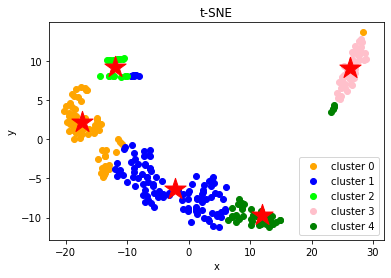

In [23]:
# Apply multi-dimensional scaling (t-SNE) to project both the data and the k-Means cluster centers to a 2D space
# Project both the data and the k-Means cluster centers to 2D.
# Plot the transformed examples and the centers with k=8

k = 5
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df2.values)
data_and_centers = np.r_[df2.values,clustered_data_sklearn.cluster_centers_]
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE')

In [24]:
# Add the new cluster labels as an extra column in the original dataframe

df2['cluster_k5'] = pd.Series(clustered_data_sklearn.labels_, index=df2.index)
df2


,Area_m2,Average_Daily_kWh,Peak_Daily_kWh,cluster_k5
0,73,11.022647,68.0,0
1,73,11.855147,51.0,1
2,73,14.113088,45.0,1
3,73,12.518088,39.0,1
4,73,6.875882,23.0,4
...,...,...,...,...
268,133,29.682647,90.0,2
269,73,12.424412,66.0,0
270,80,17.712794,95.0,0
271,102,14.245000,41.0,1


In [25]:
# Compute the mean value of each attribute for each cluster

df2.groupby('cluster_k5').mean()

,Area_m2,Average_Daily_kWh,Peak_Daily_kWh
cluster_k5,,,
0,73.365079,16.532596,66.460317
1,75.074074,12.255588,41.444444
2,118.411765,21.457085,70.176471
3,47.000000,9.203957,39.767442
4,69.904762,6.723761,18.761905


In [26]:
# k=3; Load the dataset

df3= pd.read_csv('CharlestownTotals.csv')
df3.drop('Unnamed: 0', axis=1, inplace=True)
df3['Area_m2'].replace('', np.nan, inplace=True)
df3.dropna(subset=['Area_m2'], inplace=True)
df3

,Area_m2,Average_Daily_kWh,Peak_Daily_kWh
0,73,11.022647,68.0
1,73,11.855147,51.0
2,73,14.113088,45.0
3,73,12.518088,39.0
4,73,6.875882,23.0
...,...,...,...
268,133,29.682647,90.0
269,73,12.424412,66.0
270,80,17.712794,95.0
271,102,14.245000,41.0


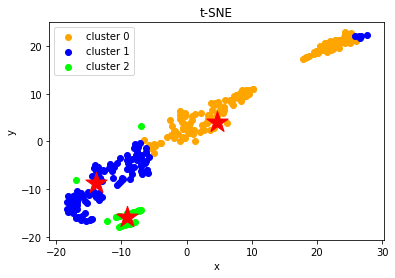

In [27]:
# Apply multi-dimensional scaling (t-SNE) to project both the data and the k-Means cluster centers to a 2D space
# Project both the data and the k-Means cluster centers to 2D.
# Plot the transformed examples and the centers with k=8

k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df3.values)
data_and_centers = np.r_[df3.values,clustered_data_sklearn.cluster_centers_]
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE')

In [28]:
# Add the new cluster labels as an extra column in the original dataframe

df3['cluster_k3'] = pd.Series(clustered_data_sklearn.labels_, index=df3.index)
df3


,Area_m2,Average_Daily_kWh,Peak_Daily_kWh,cluster_k3
0,73,11.022647,68.0,1
1,73,11.855147,51.0,1
2,73,14.113088,45.0,1
3,73,12.518088,39.0,0
4,73,6.875882,23.0,0
...,...,...,...,...
268,133,29.682647,90.0,2
269,73,12.424412,66.0,1
270,80,17.712794,95.0,1
271,102,14.245000,41.0,2


In [29]:
# Compute the mean value of each attribute for each cluster

df3.groupby('cluster_k3').mean()

,Area_m2,Average_Daily_kWh,Peak_Daily_kWh
cluster_k3,,,
0,64.811594,9.089360,31.637681
1,72.333333,15.157964,58.639640
2,113.625000,19.634583,61.625000
